In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [1]:
import sys
# メモリ確認用 https://qiita.com/AnchorBlues/items/883790e43417640140aa
print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000: #ここだけアレンジ
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 


# 「価格弾力性」特徴量を作成しよう
## GOAL:
#### 「価格弾力性」風味の特徴量の作成

* 価格弾力性とはなんぞや
    * 「価格弾力性が大」--> 価格変動による需要の増減が大きい
    * 「価格弾力性が小」--> 価格変動による需要の増減が小さい
* よって、各商品の各々の価格に対する平均売り上げ個数を求め、その相関を調べればいいのでは?


In [2]:
data_ex = pd.read_csv('./data/backup/data_ex4.csv')
tmp = data_ex[["item_id", "sell_price", "num"]]
tmp = tmp.groupby(["item_id", "sell_price"]).mean().reset_index()
tmp = tmp.set_index('item_id', drop=True)

In [7]:
tmp.head()

,sell_price,num
item_id,,
0,0.99,0.285714
0,1.00,1.000000
0,1.19,0.714286
0,1.75,0.428571
0,1.99,0.142857


In [3]:
item = []
corr = []
for i in range(tmp.index.max()+1):
    item.append(i)
    hoge = tmp.loc[i]
    size = hoge.size // 2
    if size <= 1:
        corr.append(0)
    else:
        score = tmp.loc[i].corr()["sell_price"]["num"] / (1 + 1/size)
        corr.append(score)

In [4]:
out = pd.DataFrame(columns=["item_id", "corr"])
out["item_id"] = item
out["corr"] = corr

In [8]:
out.head()

,item_id,corr
0,0,-0.225200
1,1,0.516147
2,2,0.313824
3,3,-0.701191
4,4,-0.700168


# 統合

In [15]:
data_ex_ = pd.merge(data_ex, out, on="item_id")
data_ex_.to_csv('./data/backup/data_ex5B.csv', index=False)

# データの可視化

In [21]:
t = data_ex["id"].str.split(pat='_', expand=True)
vis = pd.DataFrame(columns=["category", "dept", "item_id", "corr"])
vis["category"] = t[0]
vis["dept"] = t[0] + '_' + t[1]
vis["item_id"] = data_ex["item_id"]
vis["corr"] = data_ex["corr"]
vis.drop_duplicates(inplace=True)
vis.reset_index(inplace=True)

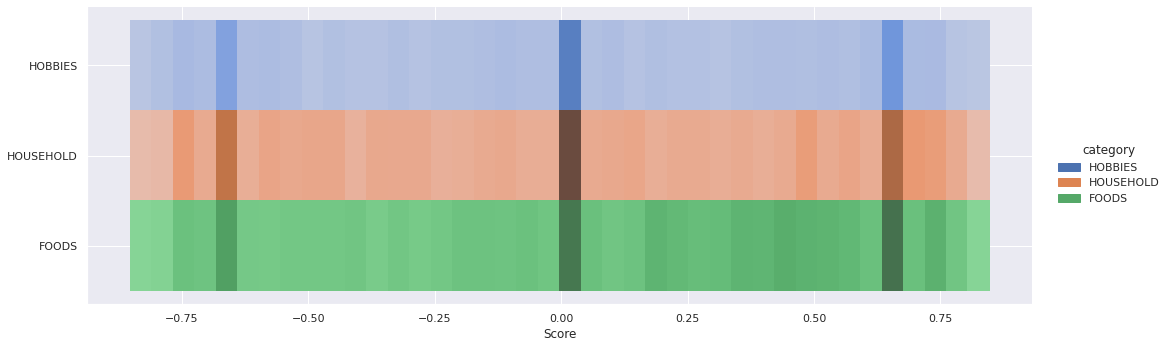

In [47]:
g = sns.displot(
    data=vis,
    x="corr", 
    y="category", 
    hue="category",
    bins=40,
    aspect=3)
g.set_axis_labels("Score", "")

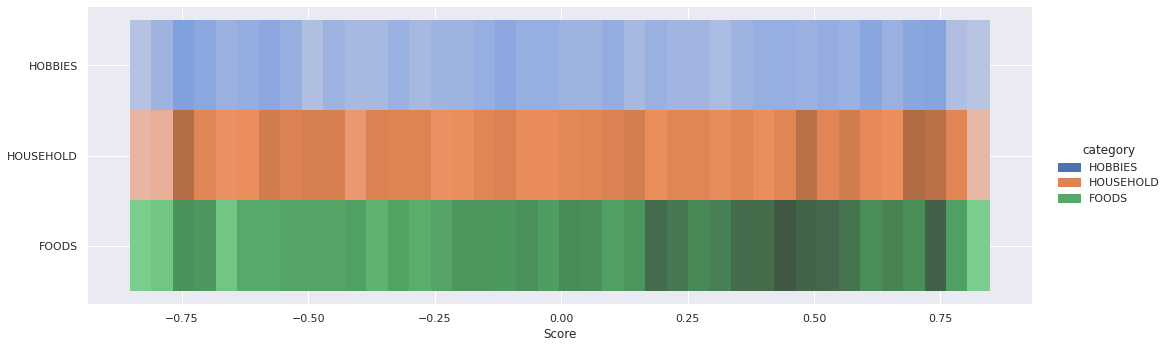

In [56]:
g = sns.displot(
    data=vis[(vis["corr"]!=0) & ((abs(vis["corr"])>0.67) | (abs(vis["corr"])<0.66))],
    x="corr", 
    y="category", 
    hue="category",
    bins=40,
    aspect=3)
g.set_axis_labels("Score", "")

In [54]:
vis[(vis["corr"]!=0) & ((abs(vis["corr"])>0.67) | (abs(vis["corr"])<0.66))]

,index,category,dept,item_id,corr
0,6,HOBBIES,HOBBIES_1,1444,-0.730432
1,19263,HOBBIES,HOBBIES_1,1445,0.125286
2,38239,HOBBIES,HOBBIES_1,1446,0.679180
3,57929,HOBBIES,HOBBIES_1,1448,-0.772784
4,77612,HOBBIES,HOBBIES_1,1451,-0.035299
...,...,...,...,...,...
3039,47686449,FOODS,FOODS_3,1078,-0.202186
3040,47691327,HOUSEHOLD,HOUSEHOLD_1,2238,0.107226
3041,47695477,FOODS,FOODS_3,1112,0.101051
3042,47700621,FOODS,FOODS_3,1175,0.575755


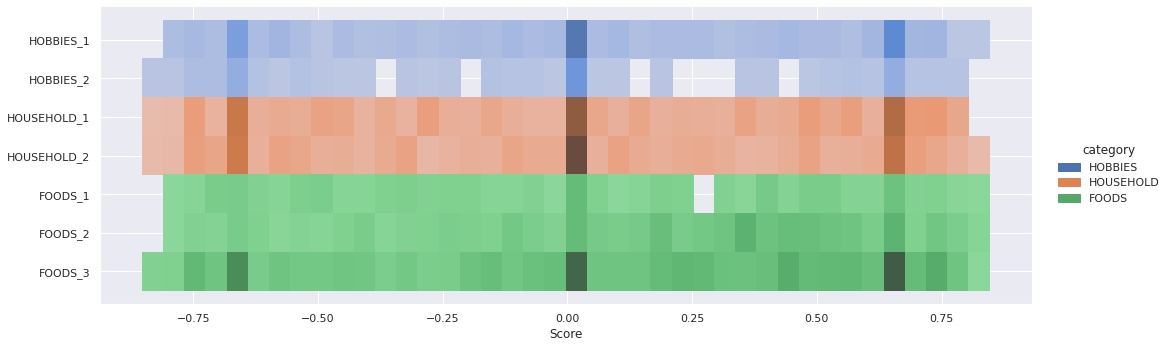

In [44]:
g = sns.displot(
    data=vis,
    x="corr", 
    y="dept", 
    hue="category",
    bins=40,
    aspect=3)
g.set_axis_labels("Score", "")

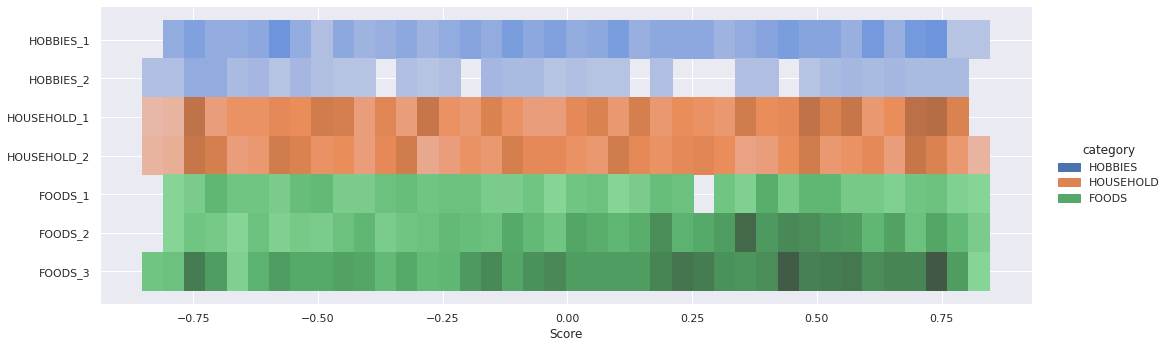

In [55]:
g = sns.displot(
    data=vis[(vis["corr"]!=0) & ((abs(vis["corr"])>0.67) | (abs(vis["corr"])<0.66))],
    x="corr", 
    y="dept", 
    hue="category",
    bins=40,
    aspect=3)
g.set_axis_labels("Score", "")

* 特にfoodで顕著な傾向。
    * 商品が売れる時期に値上げを行い、売れない時期には価格を下げている？ 